## Step 1: Preparing Data

In [1]:
import os

In [2]:
import pandas as pd

# File paths
train_csv_path = "Dataset/train.csv"
val_csv_path = "Dataset/val.csv"
test_csv_path = "Dataset/test.csv"

# Load CSV files
train_data = pd.read_csv(train_csv_path)
val_data = pd.read_csv(val_csv_path)
test_data = pd.read_csv(test_csv_path)

# Inspect the data
print(train_data.head())


              clip_name                                   clip_path  \
0  v_BenchPress_g14_c03  /train/BenchPress/v_BenchPress_g14_c03.avi   
1  v_BenchPress_g05_c06  /train/BenchPress/v_BenchPress_g05_c06.avi   
2  v_BenchPress_g21_c03  /train/BenchPress/v_BenchPress_g21_c03.avi   
3  v_BenchPress_g23_c05  /train/BenchPress/v_BenchPress_g23_c05.avi   
4  v_BenchPress_g25_c01  /train/BenchPress/v_BenchPress_g25_c01.avi   

        label  
0  BenchPress  
1  BenchPress  
2  BenchPress  
3  BenchPress  
4  BenchPress  


In [3]:
# Remove leading slash for relative paths
train_data['clip_path'] = train_data['clip_path'].apply(lambda x: x.lstrip('/'))
val_data['clip_path'] = val_data['clip_path'].apply(lambda x: x.lstrip('/'))
test_data['clip_path'] = test_data['clip_path'].apply(lambda x: x.lstrip('/'))

# Verify changes
print(train_data['clip_path'].head())


0    train/BenchPress/v_BenchPress_g14_c03.avi
1    train/BenchPress/v_BenchPress_g05_c06.avi
2    train/BenchPress/v_BenchPress_g21_c03.avi
3    train/BenchPress/v_BenchPress_g23_c05.avi
4    train/BenchPress/v_BenchPress_g25_c01.avi
Name: clip_path, dtype: object


In [4]:
import cv2
import numpy as np
import os

def preprocess_video(video_path, target_size=(64, 64), grayscale=False):
    """
    Preprocess a single video by resizing frames and normalizing pixel values.
    """
    cap = cv2.VideoCapture(os.path.join("Dataset/",video_path))
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        # Resize frame
        frame = cv2.resize(frame, target_size)
        # Convert to grayscale if needed
        if grayscale:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frame = frame[..., np.newaxis]  # Add channel dimension for grayscale
        frames.append(frame / 255.0)  # Normalize to [0, 1]
    cap.release()
    return np.array(frames)

sample_video_path = train_data.iloc[0]['clip_path']
frames = preprocess_video(sample_video_path)
print("Shape of preprocessed video:", frames.shape)  # (num_frames, 64, 64, channels)


Shape of preprocessed video: (105, 64, 64, 3)


In [5]:
sequence_length = 20
target_length = 20

In [ ]:
# Process videos and save numpy arrays
def process_and_save_videos(data):
    inputs = []
    targets = []
    for _, row in data.iterrows():
        video_path = row['clip_path']

        # Preprocess the video
        frames = preprocess_video(video_path, target_size=(64, 64), grayscale=False)
        if frames is not None:  # Only save if preprocessing was successful
            for i in range(0,(len(frames) - sequence_length - target_length),sequence_length+target_length):
                inputs.append(frames[i : i + sequence_length])  # Input sequence
                targets.append(frames[i + sequence_length : i + sequence_length + target_length])
            print(f"Processed and saved: {video_path}")
        else:
            print(f"Skipping video: {video_path} (could not preprocess)")

    return np.array(inputs), np.array(targets)


## Saving Data

In [ ]:
train_inputs, train_targets = process_and_save_videos(train_data)

Processed and saved: train/BenchPress/v_BenchPress_g14_c03.avi
Processed and saved: train/BenchPress/v_BenchPress_g05_c06.avi
Processed and saved: train/BenchPress/v_BenchPress_g21_c03.avi
Processed and saved: train/BenchPress/v_BenchPress_g23_c05.avi
Processed and saved: train/BenchPress/v_BenchPress_g25_c01.avi
Processed and saved: train/BenchPress/v_BenchPress_g03_c04.avi
Processed and saved: train/BenchPress/v_BenchPress_g08_c05.avi
Processed and saved: train/BenchPress/v_BenchPress_g02_c06.avi
Processed and saved: train/BenchPress/v_BenchPress_g24_c03.avi
Processed and saved: train/BenchPress/v_BenchPress_g15_c03.avi
Processed and saved: train/BenchPress/v_BenchPress_g05_c07.avi
Processed and saved: train/BenchPress/v_BenchPress_g10_c03.avi
Processed and saved: train/BenchPress/v_BenchPress_g18_c04.avi
Processed and saved: train/BenchPress/v_BenchPress_g14_c02.avi
Processed and saved: train/BenchPress/v_BenchPress_g25_c07.avi
Processed and saved: train/BenchPress/v_BenchPress_g20_

In [8]:
val_inputs, val_csv_path_targets = process_and_save_videos(val_data)

Processed and saved: val/BenchPress/v_BenchPress_g04_c05.avi
Processed and saved: val/BenchPress/v_BenchPress_g22_c05.avi
Processed and saved: val/BenchPress/v_BenchPress_g09_c06.avi
Processed and saved: val/BenchPress/v_BenchPress_g07_c05.avi
Processed and saved: val/BenchPress/v_BenchPress_g18_c06.avi
Processed and saved: val/BenchPress/v_BenchPress_g22_c03.avi
Processed and saved: val/BenchPress/v_BenchPress_g20_c07.avi
Processed and saved: val/BenchPress/v_BenchPress_g02_c07.avi
Processed and saved: val/BenchPress/v_BenchPress_g05_c05.avi
Processed and saved: val/BenchPress/v_BenchPress_g15_c01.avi
Processed and saved: val/BenchPress/v_BenchPress_g20_c05.avi
Processed and saved: val/BenchPress/v_BenchPress_g12_c06.avi
Processed and saved: val/BenchPress/v_BenchPress_g17_c05.avi
Processed and saved: val/BenchPress/v_BenchPress_g19_c06.avi
Processed and saved: val/BenchPress/v_BenchPress_g09_c03.avi
Processed and saved: val/BenchPress/v_BenchPress_g19_c03.avi
Processed and saved: val

## Models

### ConvLSTM

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [10]:
from keras.models import Sequential
from keras.layers import ConvLSTM2D, BatchNormalization, Conv3D
import keras
from keras import layers

# Construct the input layer with no definite frame size.
input_shape = (20, 64, 64, 3)
inp = layers.Input(shape=(None, *input_shape[1:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.Conv3D(
    filters=3, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adam(),
)


In [11]:
from keras.callbacks import ModelCheckpoint

# Define the callback for saving checkpoints
checkpoint = ModelCheckpoint(
    filepath="conv_lstm_model_checkpoint.keras",  # Path to save the model
    monitor="val_loss",                       # Monitor validation loss
    save_best_only=True,                      # Save only the best model
    save_weights_only=False,                  # Save the entire model
    verbose=1                                 # Print information when saving
)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)


In [ ]:

# Train the model
history = model.fit(
    x=train_inputs,
    y=train_targets,
    batch_size=5,
    epochs=20,
    validation_data=(val_inputs, val_csv_path_targets),
    callbacks=[early_stopping, reduce_lr, checkpoint],
)

# Save the model
model.save("conv_lstm_model.keras")


### Resume Model

In [12]:
from keras.models import load_model

# Load the model from the checkpoint
model = load_model("conv_lstm_model_checkpoint.keras")

# Resume training
history = model.fit(
    x=train_inputs,
    y=train_targets,
    batch_size=5,
    epochs=16,
    validation_data=(val_inputs, val_csv_path_targets),
    callbacks=[early_stopping, reduce_lr, checkpoint],
)

# Save the model
model.save("conv_lstm_model.keras")

Epoch 1/16
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - loss: 0.5325 
Epoch 1: val_loss improved from inf to 0.54444, saving model to conv_lstm_model_checkpoint.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 8167s 21s/step - loss: 0.5325 - val_loss: 0.5444 - learning_rate: 0.0010
Epoch 2/16
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - loss: 0.5317 
Epoch 2: val_loss did not improve from 0.54444
386/386 ━━━━━━━━━━━━━━━━━━━━ 8095s 21s/step - loss: 0.5317 - val_loss: 0.5452 - learning_rate: 0.0010
Epoch 3/16
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - loss: 0.5272 
Epoch 3: val_loss improved from 0.54444 to 0.54013, saving model to conv_lstm_model_checkpoint.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 8154s 21s/step - loss: 0.5272 - val_loss: 0.5401 - learning_rate: 0.0010
Epoch 4/16
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - loss: 0.5306 
Epoch 4: val_loss did not improve from 0.54013
386/386 ━━━━━━━━━━━━━━━━━━━━ 8217s 21s/step - loss: 0.5306 - val_loss: 0.5419 - learning_rate: 0.0010
Epoch 5/16
386/386 ━━━━━━━━━

KeyboardInterrupt: 

## Load Model

In [13]:
from keras.models import load_model

# Load the model from the checkpoint
model = load_model("conv_lstm_model_checkpoint.keras")

## Evaluate

In [15]:
loss = model.evaluate(val_inputs, val_csv_path_targets, batch_size=4)
print(f"Validation Loss (MSE): {loss}")

81/81 ━━━━━━━━━━━━━━━━━━━━ 411s 5s/step - loss: 0.5345
Validation Loss (MSE): 0.5395095348358154


## Test

In [32]:
# Predict the next frames for the first validation sequence
predicted_frames = model.predict(val_inputs[15:16])  # Shape: (1, output_frames, 64, 64, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


## Save Video

In [34]:
import cv2
import numpy as np

def save_video(frames, output_path, fps=5):
    """
    Save frames as a video.
    Args:
    - frames: Array of frames to save as a video (shape: num_frames, height, width, channels).
    - output_path: Path to save the video.
    - fps: Frames per second for the video.
    """
    height, width, channels = frames[0].shape
    writer = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
    print(len(frames))
    for frame in frames:
        frame_bgr = (frame * 255).astype(np.uint8)  # Convert to uint8
        writer.write(cv2.cvtColor(frame_bgr, cv2.COLOR_RGB2BGR))  # Convert RGB to BGR for OpenCV

    writer.release()

# Save the predicted frames as a video
save_video(predicted_frames[0], "predicted_video.mp4")
print("Predicted video saved as 'predicted_video.mp4'")


20
Predicted video saved as 'predicted_video.mp4'


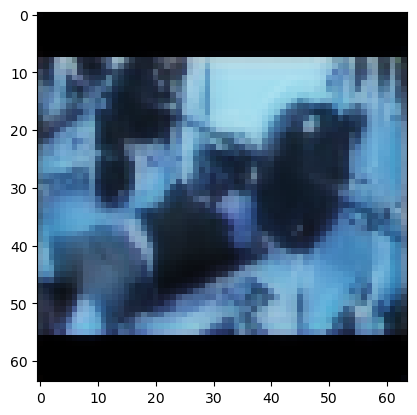

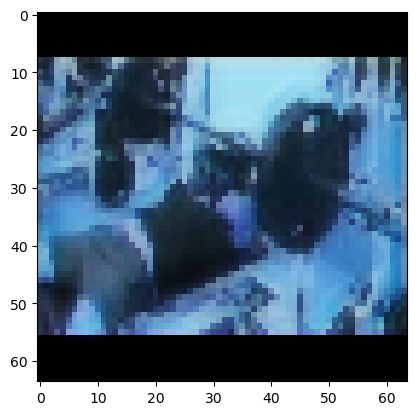

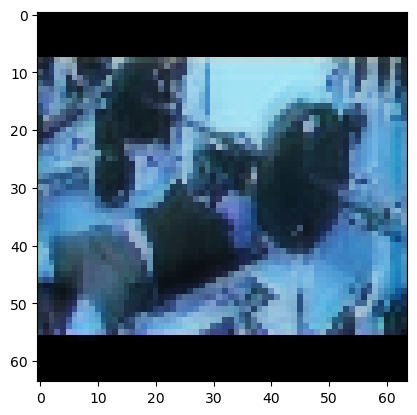

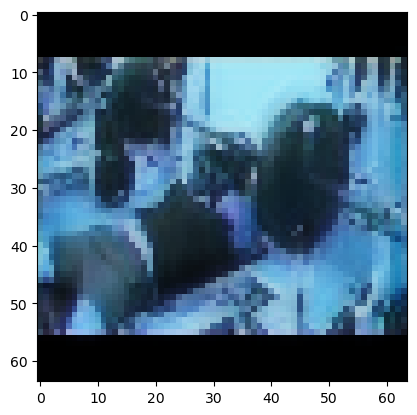

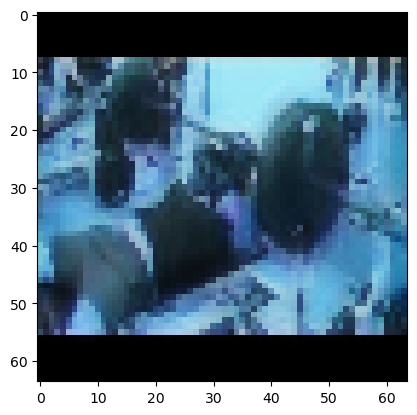

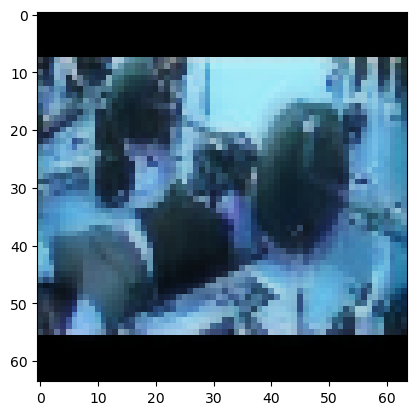

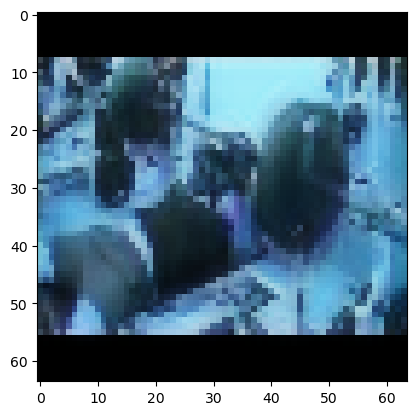

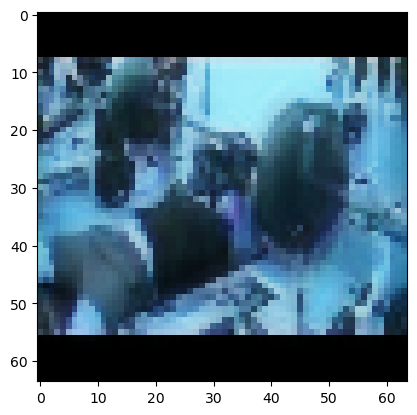

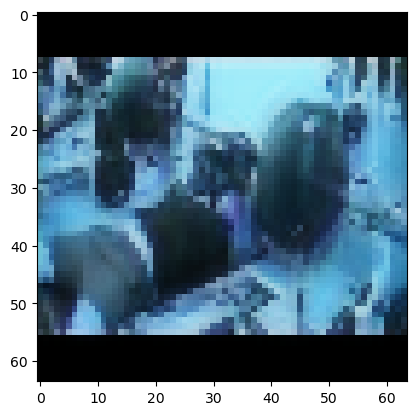

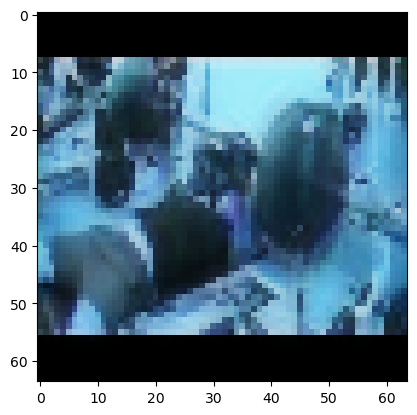

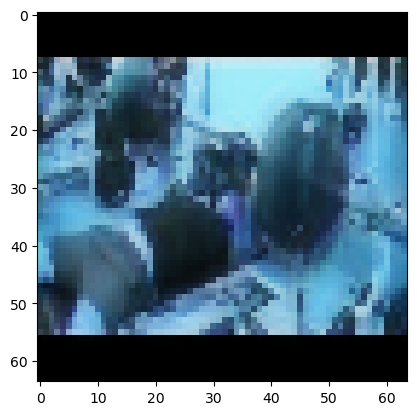

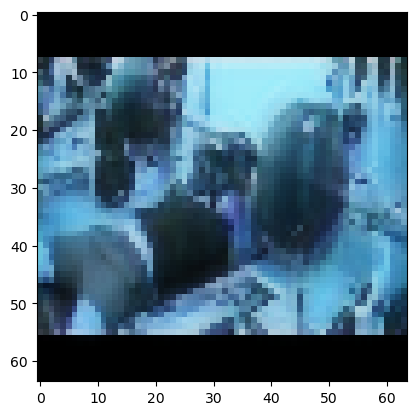

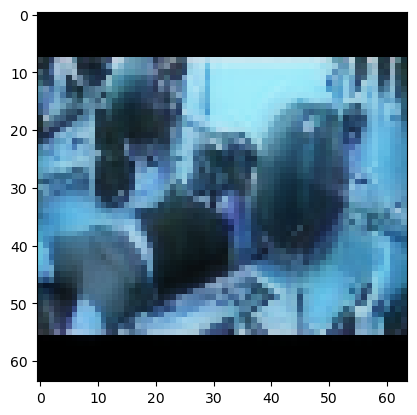

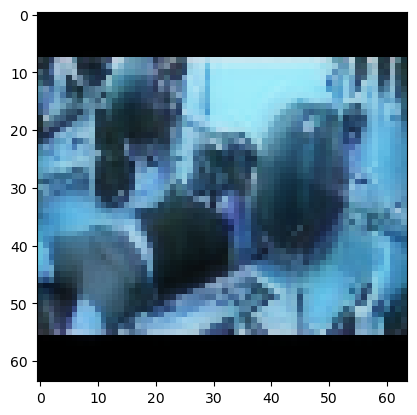

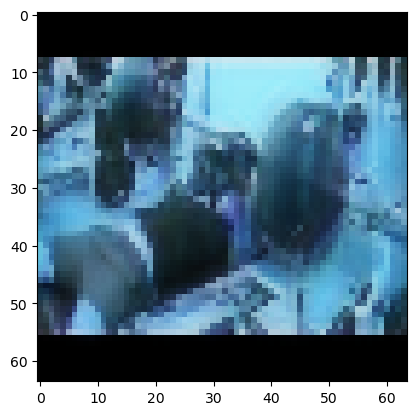

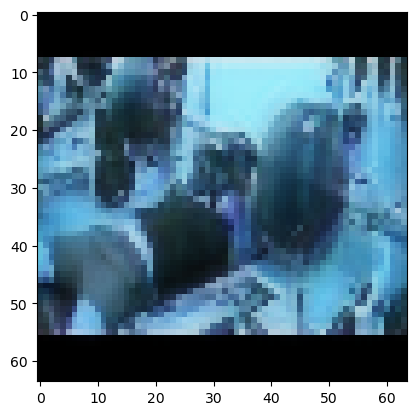

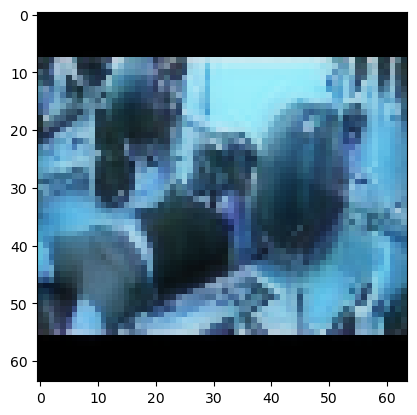

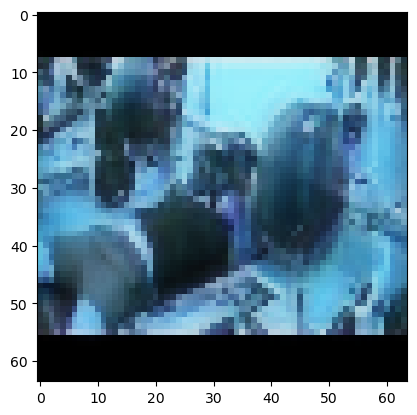

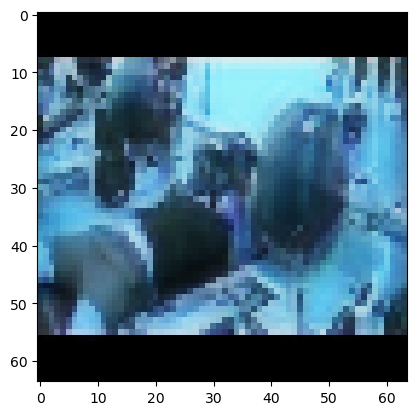

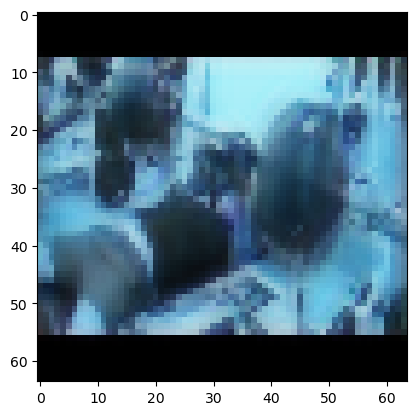

In [33]:
import matplotlib.pyplot as plt

def display_rescaled_frames(input_frames, predicted_frames):
    sequence_length = len(input_frames)
    output_frames = len(predicted_frames)

    # # Setup plot dimensions
    # num_cols = 4
    # fig, axes = plt.subplots(2, num_cols, figsize=(15, 5))

    # # Display input frames in the first row
    # for i in range(num_cols):
    #     if i < sequence_length:
    #         axes[0, i].imshow(input_frames[i])
    #         axes[0, i].set_title(f"Input Frame {i+1}")
    #     axes[0, i].axis("off")

    # # Display rescaled predicted frames in the second row
    # for i in range(num_cols):
    #     if i < output_frames:
    #         axes[1, i].imshow(input_frames[i])
    #         axes[1, i].set_title(f"Predicted Frame {i+1}")
    #     axes[1, i].axis("off")

    # plt.tight_layout()
    for frame in predicted_frames:
        plt.imshow(frame)
        plt.show()

# Call the function with rescaled predicted frames
display_rescaled_frames(val_inputs[0:1], predicted_frames[0])
